## FAANG Stocks

<i> Project by: Dawn, Sophia, Wee Kiam, Zu

FAANG stocks make up about 15% of the S&P 500 index. 

FAANG stocks refer to these following five companies:
Facebook (FB),
Apple (AAPL),
Amazon (AMZN),
Netflix (NFLX),
Google (GOOG)

Our data is collected using the Yahoo Finance API. 

In this notebook, we look into the monthly annualized volatility of the closing price of these stocks and how they can impact decisionmaking for traders. Additionally, we also compare the closing price of the different stocks to see if they have the same distributions. 

In [1]:
# importing needed libraries/modules
import numpy as np 
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns 
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from statsmodels.formula.api import ols 
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import normaltest
from sklearn import preprocessing
import statsmodels.stats.multicomp as multi
import scikit_posthocs as sp

### Using Yahoo Finance API to pull data into DataFrames

In [2]:
AAPL_Ticker= yf.Ticker('AAPL')
tickerAAPL = AAPL_Ticker.history(period='1d', start='2005-1-1', end='2021-1-1')
print(tickerAAPL)

                  Open        High         Low       Close      Volume  \
Date                                                                     
2004-12-31    0.996412    0.998101    0.983207    0.988888   278588800   
2005-01-03    0.994723    0.999791    0.961248    0.971844   691992000   
2005-01-04    0.979521    1.005318    0.966930    0.981825  1096810400   
2005-01-05    0.989809    1.001940    0.983514    0.990424   680433600   
2005-01-06    0.993034    0.996720    0.972458    0.991192   705555200   
...                ...         ...         ...         ...         ...   
2020-12-24  130.901713  133.034896  130.682413  131.549637    54930100   
2020-12-28  133.563211  136.902532  133.084729  136.254608   124486200   
2020-12-29  137.610278  138.347911  133.912089  134.440399   121047300   
2020-12-30  135.148143  135.556841  132.975079  133.294067    96452100   
2020-12-31  133.652921  134.310822  131.300438  132.267349    99116600   

            Dividends  Stock Splits  

In [3]:
AMZN_Ticker= yf.Ticker('AMZN')
tickerAMZN = AMZN_Ticker.history(period='1d', start='2005-1-1', end='2021-1-1')
print(tickerAMZN)

                   Open         High          Low        Close    Volume  \
Date                                                                       
2004-12-31    45.130001    45.490002    44.160000    44.290001   4790700   
2005-01-03    44.950001    45.439999    44.209999    44.520000  10446500   
2005-01-04    42.669998    43.259998    41.500000    42.139999  19418500   
2005-01-05    41.570000    42.759998    41.560001    41.770000   8354200   
2005-01-06    41.810001    42.250000    40.900002    41.049999   8700900   
...                 ...          ...          ...          ...       ...   
2020-12-24  3193.899902  3202.000000  3169.000000  3172.689941   1451900   
2020-12-28  3194.000000  3304.000000  3172.689941  3283.959961   5686800   
2020-12-29  3309.939941  3350.649902  3281.219971  3322.000000   4872900   
2020-12-30  3341.000000  3342.100098  3282.469971  3285.850098   3209300   
2020-12-31  3275.000000  3282.919922  3241.199951  3256.929932   2957200   

           

In [4]:
FB_Ticker= yf.Ticker('FB')
tickerFB = FB_Ticker.history(period='1d', start='2005-1-1', end='2021-1-1')
print(tickerFB)

                  Open        High         Low       Close     Volume  \
Date                                                                    
2012-05-18   42.049999   45.000000   38.000000   38.230000  573576400   
2012-05-21   36.529999   36.660000   33.000000   34.029999  168192700   
2012-05-22   32.610001   33.590000   30.940001   31.000000  101786600   
2012-05-23   31.370001   32.500000   31.360001   32.000000   73600000   
2012-05-24   32.950001   33.209999   31.770000   33.029999   50237200   
...                ...         ...         ...         ...        ...   
2020-12-24  268.880005  270.399994  266.200012  267.399994    6702000   
2020-12-28  268.739990  277.299988  265.660004  277.000000   23299700   
2020-12-29  276.950012  280.510010  276.279999  276.779999   16383000   
2020-12-30  277.950012  278.079987  271.709991  271.869995   11803800   
2020-12-31  272.000000  277.089996  269.809998  273.160004   12900400   

            Dividends  Stock Splits  
Date        

In [5]:
GOOG_Ticker= yf.Ticker('GOOG')
tickerGOOG = GOOG_Ticker.history(period='1d', start='2005-1-1', end='2021-1-1')
print(tickerGOOG)

                   Open         High          Low        Close    Volume  \
Date                                                                       
2004-12-31    99.243011    99.566795    95.920464    96.035034  15394487   
2005-01-03    98.331429   101.439781    97.365051   100.976517  31807176   
2005-01-04   100.323959   101.086105    96.378746    96.886841  27614921   
2005-01-05    96.363808    98.082359    95.756081    96.393692  16534946   
2005-01-06    97.175758    97.584229    93.509506    93.922951  20852067   
...                 ...          ...          ...          ...       ...   
2020-12-24  1735.000000  1746.000000  1729.109985  1738.849976    346800   
2020-12-28  1751.635010  1790.728027  1746.334961  1776.089966   1393000   
2020-12-29  1787.790039  1792.439941  1756.089966  1758.719971   1299400   
2020-12-30  1762.010010  1765.094971  1725.599976  1739.520020   1306100   
2020-12-31  1735.420044  1758.930054  1735.420044  1751.880005   1011900   

           

In [6]:
NFLX_Ticker= yf.Ticker('NFLX')
tickerNFLX = NFLX_Ticker.history(period='1d', start='2005-1-1', end='2021-1-1')
print(tickerNFLX)

                  Open        High         Low       Close    Volume  \
Date                                                                   
2004-12-31    1.830000    1.830000    1.747143    1.761429   9830800   
2005-01-03    1.800000    1.800000    1.645714    1.702857  11334400   
2005-01-04    1.702857    1.707143    1.607143    1.665714  17352300   
2005-01-05    1.677143    1.677143    1.584286    1.600000  12732300   
2005-01-06    1.600000    1.624286    1.572857    1.578571   8273300   
...                ...         ...         ...         ...       ...   
2020-12-24  515.119995  519.349976  512.210022  513.969971   1144000   
2020-12-28  516.429993  523.659973  507.130005  519.119995   2891900   
2020-12-29  519.900024  536.549988  515.479980  530.869995   4022400   
2020-12-30  530.130005  533.260010  523.690002  524.590027   1876300   
2020-12-31  525.530029  545.500000  523.150024  540.729980   5392300   

            Dividends  Stock Splits  
Date                     

### Normality Test for FAANG Closing Price

In [7]:
# Function for D'Agostino's K^2 Normality Test
def AgostinoNormalityTest(input): 
    stat, p = normaltest(input)         ## D'Agostino's K^2 Normality Test

    print('stat=%.2f, p=%.2f' % (stat, p))
    if p > 0.05:
        print('Approximately Normally Distributed')
    else:
        print('Not Approximately Normally Distributed')
    sns.distplot(input,fit=stats.invgamma,kde=True)  

stat=150.94, p=0.00
Not Approximately Normally Distributed


/Users/sophia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sophia/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


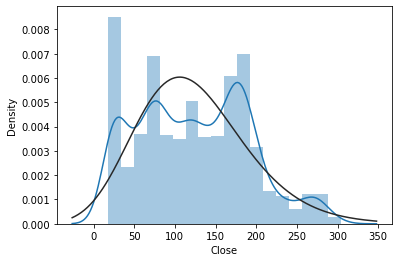

In [8]:
## D'Agostino's K^2 Normality Test on TSLA Closing Price
AgostinoNormalityTest(tickerFB['Close'])

stat=1208.28, p=0.00
Not Approximately Normally Distributed


/Users/sophia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sophia/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


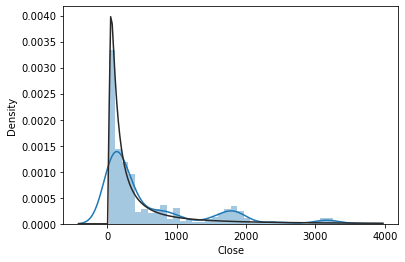

In [9]:
## D'Agostino's K^2 Normality Test on TSLA Closing Price
AgostinoNormalityTest(tickerAMZN['Close'])

stat=1599.05, p=0.00
Not Approximately Normally Distributed


/Users/sophia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sophia/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


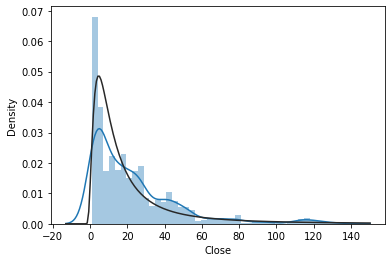

In [10]:
## D'Agostino's K^2 Normality Test on TSLA Closing Price
AgostinoNormalityTest(tickerAAPL['Close'])

stat=476.75, p=0.00
Not Approximately Normally Distributed


/Users/sophia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sophia/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


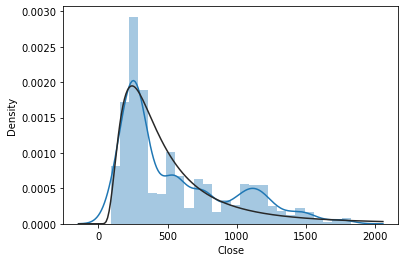

In [11]:
## D'Agostino's K^2 Normality Test on TSLA Closing Price
AgostinoNormalityTest(tickerGOOG['Close'])

stat=926.36, p=0.00
Not Approximately Normally Distributed


/Users/sophia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sophia/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


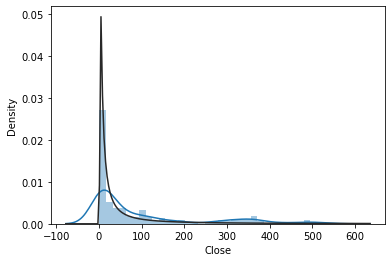

In [12]:
## D'Agostino's K^2 Normality Test on TSLA Closing Price
AgostinoNormalityTest(tickerNFLX['Close'])

### Calculating Daily Returns (%) of Closing Price for FAANG stocks

In [13]:
#To model returns we will use daily % change
daily_ret_FB = tickerFB['Close'].pct_change()
#drop the 1st value - nan
daily_ret_FB.dropna(inplace=True)
#daily %change
daily_ret_FB.head()

Date
2012-05-21   -0.109861
2012-05-22   -0.089039
2012-05-23    0.032258
2012-05-24    0.032187
2012-05-25   -0.033909
Name: Close, dtype: float64

In [14]:
#To model returns we will use daily % change
daily_ret_AAPL = tickerAAPL['Close'].pct_change()
#drop the 1st value - nan
daily_ret_AAPL.dropna(inplace=True)
#daily %change
daily_ret_AAPL.head()

Date
2005-01-03   -0.017236
2005-01-04    0.010270
2005-01-05    0.008758
2005-01-06    0.000776
2005-01-07    0.072811
Name: Close, dtype: float64

In [15]:
#To model returns we will use daily % change
daily_ret_AMZN = tickerAMZN['Close'].pct_change()
#drop the 1st value - nan
daily_ret_AMZN.dropna(inplace=True)
#daily %change
daily_ret_AMZN.head()

Date
2005-01-03    0.005193
2005-01-04   -0.053459
2005-01-05   -0.008780
2005-01-06   -0.017237
2005-01-07    0.030938
Name: Close, dtype: float64

In [16]:
#To model returns we will use daily % change
daily_ret_NFLX = tickerNFLX['Close'].pct_change()
#drop the 1st value - nan
daily_ret_NFLX.dropna(inplace=True)
#daily %change
daily_ret_NFLX.head()

Date
2005-01-03   -0.033253
2005-01-04   -0.021812
2005-01-05   -0.039451
2005-01-06   -0.013393
2005-01-07    0.006335
Name: Close, dtype: float64

In [17]:
#To model returns we will use daily % change
daily_ret_GOOG = tickerGOOG['Close'].pct_change()
#drop the 1st value - nan
daily_ret_GOOG.dropna(inplace=True)
#daily %change
daily_ret_GOOG.head()

Date
2005-01-03    0.051455
2005-01-04   -0.040501
2005-01-05   -0.005090
2005-01-06   -0.025632
2005-01-07    0.028109
Name: Close, dtype: float64

### Plotting Monthly Annualized Volatility for FAANG stocks

#### Volatility often refers to the amount of uncertainty or risk related to the size of changes in a security's value. A higher volatility means that a security's value can potentially be spread out over a larger range of values. This means that the price of the security can change dramatically over a short time period in either direction. A lower volatility means that a security's value does not fluctuate dramatically, and tends to be more steady. Hence, we have opted to analyze the volatility of the FAANG stocks to gain some insights.

##### We first resample the daily returns into monthly frequency, then we convert that into monthly volatility by calculating standard deviation. Finally, we annualize the figure by multiplying by the square root of 12 (because there are 12 months in a year). They are then plotted into our chart.

##### We also calculated the final average monthly volatility ranking over the time period of the samples. e.g. FB is 8 years, the rest are 20 years.

In [18]:
#resize charts to fit screen if using Jupyter Notebook
plt.rcParams['figure.figsize']=[15,5]

Date
2012-05-31    0.220893
2012-06-30    0.113771
2012-07-31    0.134553
2012-08-31    0.126256
2012-09-30    0.145465
Freq: M, Name: Close, dtype: float64


Date
1     8.500000
2     5.375000
3     6.750000
4     7.000000
5     4.444444
6     5.777778
7     7.888889
8     5.111111
9     6.444444
10    7.222222
11    6.444444
12    5.444444
Name: Close, dtype: float64

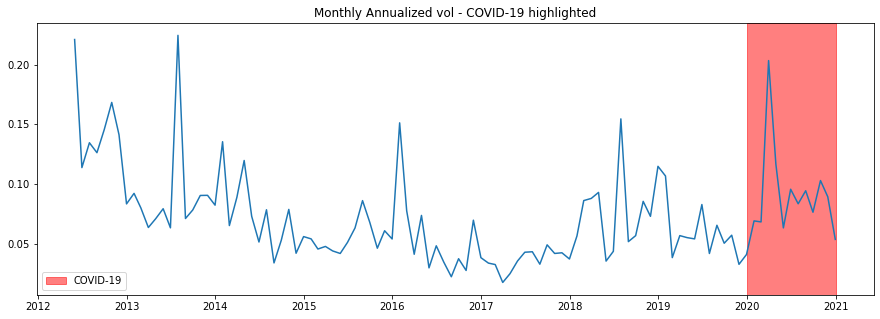

In [19]:
#use pandas to resample returns per month and take Standard Dev as measure of Volatility
#then annualize by multiplying by sqrt of number of periods (12)
mnthly_annu_FB = daily_ret_FB.resample('M').std()* np.sqrt(12)

print(mnthly_annu_FB.head())
#we can see major market events show up in the volatility
plt.plot(mnthly_annu_FB)
plt.axvspan('2020','2021',color='r',alpha=.5)
plt.title('Monthly Annualized vol - COVID-19 highlighted')
labs = mpatches.Patch(color='red',alpha=.5, label="COVID-19")
plt.legend(handles=[labs])

#for each year rank each month based on volatility lowest=1 Highest=12
ranked_FB = mnthly_annu_FB.groupby(mnthly_annu_FB.index.year).rank()

#average the ranks over all years for each month
final_FB = ranked_FB.groupby(ranked_FB.index.month).mean()

final_FB.describe()

final_FB

Date
2005-01-31    0.098233
2005-02-28    0.079168
2005-03-31    0.078454
2005-04-30    0.124702
2005-05-31    0.081246
Freq: M, Name: Close, dtype: float64


Date
1     8.6250
2     6.6875
3     6.3750
4     7.1250
5     5.6875
6     4.9375
7     6.3750
8     5.8125
9     7.4375
10    7.6250
11    5.9375
12    5.3750
Name: Close, dtype: float64

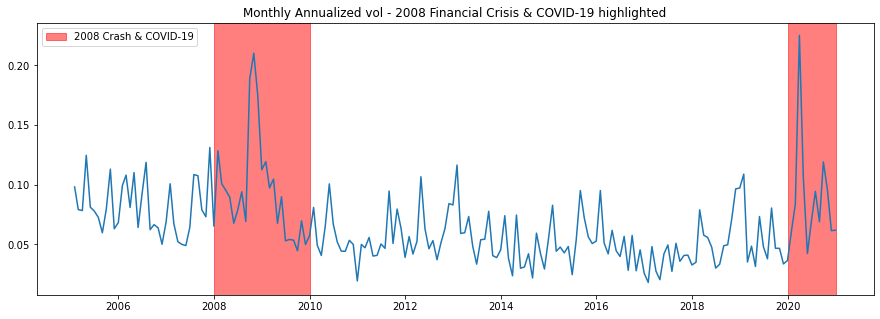

In [20]:
#use pandas to resample returns per month and take Standard Dev as measure of Volatility
#then annualize by multiplying by sqrt of number of periods (12)
mnthly_annu_AAPL = daily_ret_AAPL.resample('M').std()* np.sqrt(12)

print(mnthly_annu_AAPL.head())
#we can see major market events show up in the volatility
plt.plot(mnthly_annu_AAPL)
plt.axvspan('2008','2010',color='r',alpha=.5)
plt.axvspan('2020','2021',color='r',alpha=.5)
plt.title('Monthly Annualized vol - 2008 Financial Crisis & COVID-19 highlighted')
labs = mpatches.Patch(color='red',alpha=.5, label="2008 Crash & COVID-19")
plt.legend(handles=[labs])

#for each year rank each month based on volatility lowest=1 Highest=12
ranked_AAPL = mnthly_annu_AAPL.groupby(mnthly_annu_AAPL.index.year).rank()

#average the ranks over all years for each month
final_AAPL = ranked_AAPL.groupby(ranked_AAPL.index.month).mean()

final_AAPL.describe()

final_AAPL

Date
2005-01-31    0.082707
2005-02-28    0.120169
2005-03-31    0.038134
2005-04-30    0.056465
2005-05-31    0.035329
Freq: M, Name: Close, dtype: float64


Date
1     7.4375
2     7.1875
3     5.1875
4     8.3125
5     4.9375
6     5.5625
7     7.6250
8     4.6875
9     6.2500
10    9.5625
11    6.5625
12    4.6875
Name: Close, dtype: float64

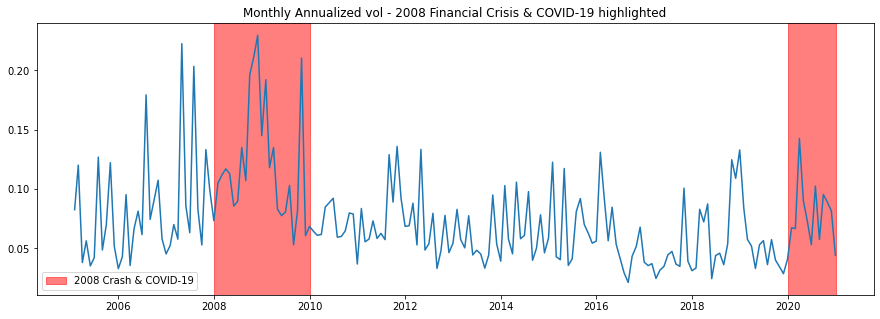

In [21]:
#use pandas to resample returns per month and take Standard Dev as measure of Volatility
#then annualize by multiplying by sqrt of number of periods (12)
mnthly_annu_AMZN = daily_ret_AMZN.resample('M').std()* np.sqrt(12)

print(mnthly_annu_AMZN.head())
#we can see major market events show up in the volatility
plt.plot(mnthly_annu_AMZN)
plt.axvspan('2008','2010',color='r',alpha=.5)
plt.axvspan('2020','2021',color='r',alpha=.5)
plt.title('Monthly Annualized vol - 2008 Financial Crisis & COVID-19 highlighted')
labs = mpatches.Patch(color='red',alpha=.5, label="2008 Crash & COVID-19")
plt.legend(handles=[labs])

#for each year rank each month based on volatility lowest=1 Highest=12
ranked_AMZN = mnthly_annu_AMZN.groupby(mnthly_annu_AMZN.index.year).rank()

#average the ranks over all years for each month
final_AMZN = ranked_AMZN.groupby(ranked_AMZN.index.month).mean()

final_AMZN.describe()

final_AMZN

Date
2005-01-31    0.073818
2005-02-28    0.100627
2005-03-31    0.102549
2005-04-30    0.112668
2005-05-31    0.139925
Freq: M, Name: Close, dtype: float64


Date
1      9.1875
2      4.4375
3      5.7500
4      8.6875
5      4.8750
6      5.1875
7      8.8750
8      4.3125
9      6.3125
10    10.3125
11     4.7500
12     5.3125
Name: Close, dtype: float64

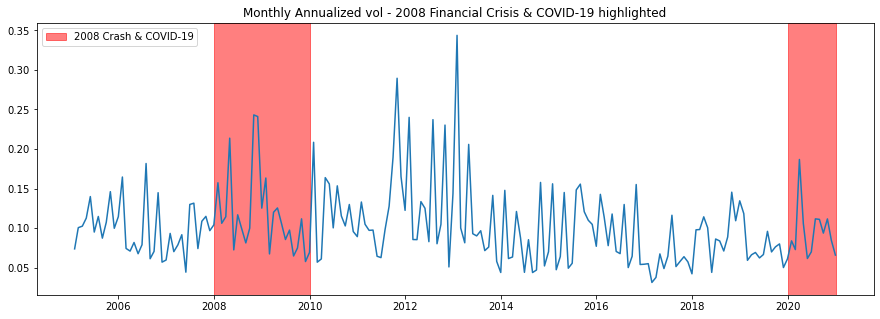

In [22]:
#use pandas to resample returns per month and take Standard Dev as measure of Volatility
#then annualize by multiplying by sqrt of number of periods (12)
mnthly_annu_NFLX = daily_ret_NFLX.resample('M').std()* np.sqrt(12)

print(mnthly_annu_NFLX.head())
#we can see major market events show up in the volatility
plt.plot(mnthly_annu_NFLX)
plt.axvspan('2008','2010',color='r',alpha=.5)
plt.axvspan('2020','2021',color='r',alpha=.5)
plt.title('Monthly Annualized vol - 2008 Financial Crisis & COVID-19 highlighted')
labs = mpatches.Patch(color='red',alpha=.5, label="2008 Crash & COVID-19")
plt.legend(handles=[labs])

#for each year rank each month based on volatility lowest=1 Highest=12
ranked_NFLX = mnthly_annu_NFLX.groupby(mnthly_annu_NFLX.index.year).rank()

#average the ranks over all years for each month
final_NFLX = ranked_NFLX.groupby(ranked_NFLX.index.month).mean()

final_NFLX.describe()

final_NFLX

Date
2005-01-31    0.102718
2005-02-28    0.097652
2005-03-31    0.043565
2005-04-30    0.073429
2005-05-31    0.057584
Freq: M, Name: Close, dtype: float64


Date
1     8.6250
2     6.5625
3     6.0000
4     8.8125
5     5.9375
6     6.2500
7     7.4375
8     4.5000
9     4.8750
10    9.5625
11    5.7500
12    3.6875
Name: Close, dtype: float64

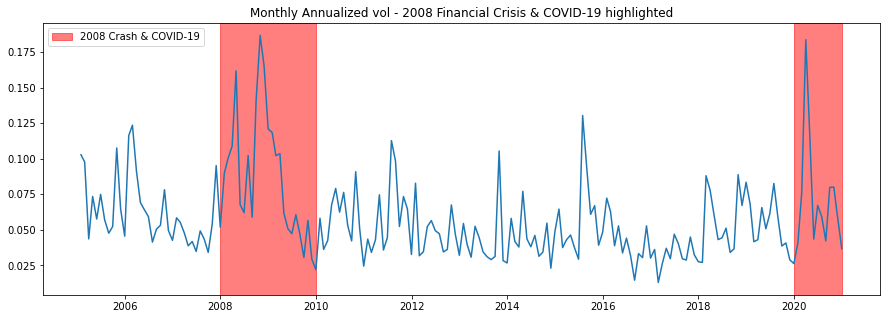

In [23]:
#use pandas to resample returns per month and take Standard Dev as measure of Volatility
#then annualize by multiplying by sqrt of number of periods (12)
mnthly_annu_GOOG = daily_ret_GOOG.resample('M').std()* np.sqrt(12)

print(mnthly_annu_GOOG.head())
#we can see major market events show up in the volatility
plt.plot(mnthly_annu_GOOG)
plt.axvspan('2008','2010',color='r',alpha=.5)
plt.axvspan('2020','2021',color='r',alpha=.5)
plt.title('Monthly Annualized vol - 2008 Financial Crisis & COVID-19 highlighted')
labs = mpatches.Patch(color='red',alpha=.5, label="2008 Crash & COVID-19")
plt.legend(handles=[labs])

#for each year rank each month based on volatility lowest=1 Highest=12
ranked_GOOG = mnthly_annu_GOOG.groupby(mnthly_annu_GOOG.index.year).rank()

#average the ranks over all years for each month
final_GOOG = ranked_GOOG.groupby(ranked_GOOG.index.month).mean()

final_GOOG.describe()

final_GOOG

### Plotting the annual monthly volatility rankings of FAANG stocks

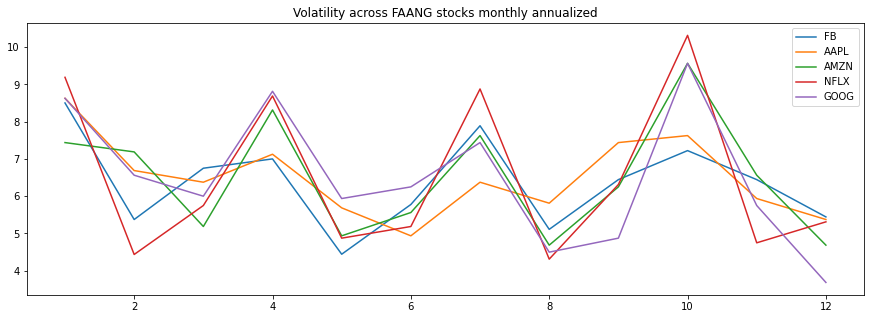

In [24]:
plt.plot(final_FB)
plt.plot(final_AAPL)
plt.plot(final_AMZN)
plt.plot(final_NFLX)
plt.plot(final_GOOG)
plt.legend (["FB", "AAPL", "AMZN", "NFLX", "GOOG" ])
plt.title("Volatility across FAANG stocks monthly annualized")
plt.show()

We noted that the annualized volatility among FAANG stocks over the period tends to be higher in the months of Jan, April, July, and oct. This meant that the price action in these few months may be larger than the rest of the months during the year. 

In the securities markets, volatility is often associated with big swings in either direction. This may provide opportunities for investors or traders to enter or exit their portfolio to gain a more favorable position depending on their respective risk appetite or profile.


### Hypothesis formulation

\begin{align}
  & {{H}_{0}}:\,\,\mu _{1}\,=\,\,\mu _{2}\,=\,\,\mu _{3}\,=\,\,\mu _{4}\,=\,\,\mu _{5}\ \\
 & {{H}_{1}}:\,\,\mu _{1}\,\ne \,\,\mu _{2}\,\ne \,\,\mu _{3}\,\ne \,\,\mu _{4}\,\ne \,\,\mu _{5} \\ 
\end{align}

<center><i><b>H0: They have the same distributions.<br>H1: They have different distributions.</i>

In [25]:
from scipy.stats import kruskal

def kruskal_wallis(input1,input2,input3,input4,input5):
    stat, p = kruskal(input1,input2,input3,input4,input5)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('They have the same distributions (fail to reject H0)')
    else:
        print('They have different distributions (reject H0)')

In [26]:
kruskal_wallis(tickerFB['Close'],tickerAAPL['Close'],tickerAMZN['Close'],tickerNFLX['Close'],tickerGOOG['Close'])

Statistics=10435.956, p=0.000
They have different distributions (reject H0)


In [27]:
# nemenyi 
from scipy import stats

data = np.array([tickerFB['Close'],tickerAAPL['Close'],tickerAMZN['Close'],tickerNFLX['Close'],tickerGOOG['Close']])

sp.posthoc_nemenyi(data)

<ipython-input-27-95f42a5fc5fe>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data = np.array([tickerFB['Close'],tickerAAPL['Close'],tickerAMZN['Close'],tickerNFLX['Close'],tickerGOOG['Close']])


,1,2,3,4,5
1,1.000000e+00,3.946391e-302,1.496006e-115,1.770512e-75,2.257670e-293
2,3.946391e-302,1.000000e+00,0.000000e+00,1.220967e-105,0.000000e+00
3,1.496006e-115,0.000000e+00,1.000000e+00,0.000000e+00,2.159133e-56
4,1.770512e-75,1.220967e-105,0.000000e+00,1.000000e+00,0.000000e+00
5,2.257670e-293,0.000000e+00,2.159133e-56,0.000000e+00,1.000000e+00


In [28]:
# dunn
import scikit_posthocs as sp
sp.posthoc_dunn(data, p_adjust = 'bonferroni')

,1,2,3,4,5
1,1.000000e+00,1.198194e-305,1.891973e-118,4.195461e-78,7.161664e-297
2,1.198194e-305,1.000000e+00,0.000000e+00,1.762907e-108,0.000000e+00
3,1.891973e-118,0.000000e+00,1.000000e+00,0.000000e+00,7.846922e-59
4,4.195461e-78,1.762907e-108,0.000000e+00,1.000000e+00,0.000000e+00
5,7.161664e-297,0.000000e+00,7.846922e-59,0.000000e+00,1.000000e+00


We notice that FB and NFLX are less different compared to the rest. This is the same for AAPL and NFLX, AMZN and GOOG. Between FB & NFLX, AAPL & NFLX, we notice that ultimately, FB and NFLX are least different. AAPL tends towards having more difference from any of the other stocks in the FAANG group of stocks.
